# Seminar 2 - Regression

### Sandra Kaljula and Sara Momiroska

#### for plotting

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### get MAE below 25 000

# Step 1 import all libraries

In [2]:
import pandas as pd
import numpy as np
import os

# processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# grid search
from sklearn.model_selection import GridSearchCV

# regression models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_absolute_error

from sklearn import datasets

# to make this notebook's output identical at every run
np.random.seed(68)

# Step 2 import your dataset

Year - The year of the salary paid \
Experience - The experience level in the job \
Type - The type of employement \
Title - The role/job title \
Residence - The employee's primary country of residence \
Salary - The total gross salary \
Currency - The currency of the salary paid \
Remote work - The possibility to work remotely \
Company location - The country of the employer's main office \
Company size - The size of the company during the year: S<50 employees, M 50-250 employees, L>250 employees \
Salary in USD - The salary in USD (this is the target variable which should be predicted) 

In [3]:
# Loading the data from the excel file
def load_data(filename):
    return pd.read_excel(filename)

dataset = load_data("Salaries.xlsx")
dataset.head()

,Year,Experience,Type,Title,Residence,Salary,Currency,Remote work,Company location,Company size,Salary in USD
0,2020,Intermediate,Full-time,Data Scientist,DE,70000,EUR,No,DE,L,79833
1,2020,Senior,Full-time,Machine Learning Scientist,JP,260000,USD,No,JP,S,260000
2,2020,Senior,Full-time,Big Data Engineer,GB,85000,GBP,Partially,GB,M,109024
3,2020,Intermediate,Full-time,Product Data Analyst,HN,20000,USD,No,HN,S,20000
4,2020,Senior,Full-time,Machine Learning Engineer,US,150000,USD,Partially,US,L,150000


# Step 3 Processing data

## Descriptive statistics over the data

In [4]:
dataset.describe()

,Year,Salary,Salary in USD
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


## Investigating outliers and removing them

### Investigating

C:\Users\Sandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary in USD'>

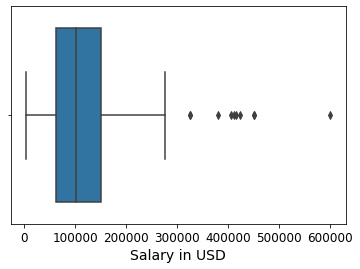

In [5]:
sns.boxplot(dataset["Salary in USD"])

<AxesSubplot:>

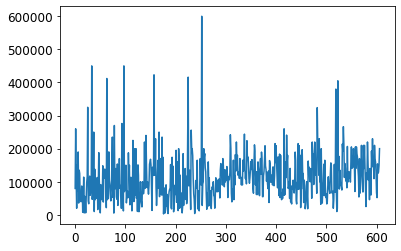

In [6]:
dataset['Salary in USD'].plot()

### Removing outliers

In [7]:
index = dataset[(dataset['Salary in USD'] >= 220000)|(dataset['Salary in USD'] <= 10000)].index
dataset.drop(index, inplace=True)
dataset['Salary in USD'].describe()

count       558.000000
mean     103759.621864
std       51019.193540
min       10354.000000
25%       63735.750000
50%      100000.000000
75%      140187.500000
max      216000.000000
Name: Salary in USD, dtype: float64

<AxesSubplot:>

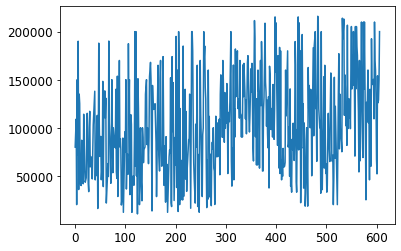

In [8]:
dataset['Salary in USD'].plot()

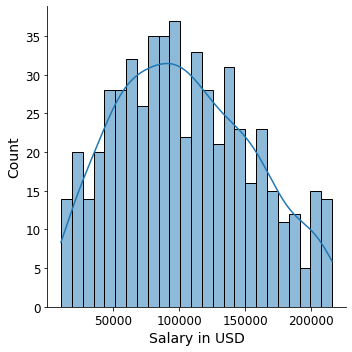

In [9]:
sns.displot(dataset, x="Salary in USD", bins=25, kde=True)

## Checking for empty cells

In [10]:
dataset.isnull().sum()

Year                0
Experience          0
Type                0
Title               0
Residence           0
Salary              0
Currency            0
Remote work         0
Company location    0
Company size        0
Salary in USD       0
dtype: int64

## Dropping irrelevant rows

C:\Users\Sandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

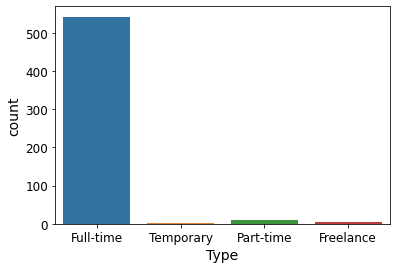

In [11]:
columns = ["Year", "Experience", "Type", "Currency", "Remote work", "Company size"]
sns.countplot(dataset[columns[2]]) #4

In [12]:
# The temporary, part-time and freelance workers are irrelevant. Dropping the rows with no full-time
dataset = dataset[dataset["Type"].str.contains("Full-time") == True] 

## Dropping irrelevant columns

In [13]:
dataset = dataset.drop(['Type'], axis=1)
dataset = dataset.drop(['Salary'], axis=1)
dataset.head() 

,Year,Experience,Title,Residence,Currency,Remote work,Company location,Company size,Salary in USD
0,2020,Intermediate,Data Scientist,DE,EUR,No,DE,L,79833
2,2020,Senior,Big Data Engineer,GB,GBP,Partially,GB,M,109024
3,2020,Intermediate,Product Data Analyst,HN,USD,No,HN,S,20000
4,2020,Senior,Machine Learning Engineer,US,USD,Partially,US,L,150000
5,2020,Junior,Data Analyst,US,USD,Yes,US,L,72000


## Plotting data

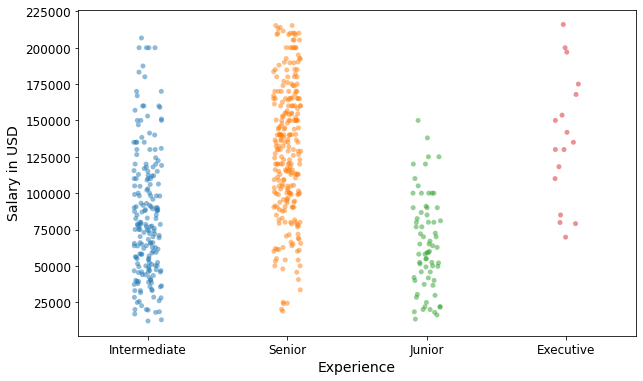

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=dataset['Experience'], y=dataset['Salary in USD'], alpha=0.5, jitter=True, ax=ax)
plt.show()

## Varibale engineering

In [15]:
dataset['Workplace abroad'] = np.where((dataset['Residence'] == dataset['Company location']), 1, 0) # If the persons residence is different to their residence
# Moved workplace abroad to 4th instead of last
first_column = dataset.pop('Workplace abroad')
dataset.insert(3, 'Workplace abroad', first_column)
dataset.head()

,Year,Experience,Title,Workplace abroad,Residence,Currency,Remote work,Company location,Company size,Salary in USD
0,2020,Intermediate,Data Scientist,1,DE,EUR,No,DE,L,79833
2,2020,Senior,Big Data Engineer,1,GB,GBP,Partially,GB,M,109024
3,2020,Intermediate,Product Data Analyst,1,HN,USD,No,HN,S,20000
4,2020,Senior,Machine Learning Engineer,1,US,USD,Partially,US,L,150000
5,2020,Junior,Data Analyst,1,US,USD,Yes,US,L,72000


## Encoding the labels

In [16]:
columns_to_process = ["Experience", "Currency", "Title", "Remote work", "Residence", "Company location", "Company size"]
# label_encoder = LabelEncoder()
for column in columns_to_process:
    # Get one hot encoding of columns 'vehicleType'
    dummy = pd.get_dummies(dataset[column])
    # Drop column as it is now encoded
    dataset = dataset.drop(column ,axis = 1)
    # Join the encoded df
    dataset = pd.concat([dataset, dummy], axis = 1)
#     dataset[column] = label_encoder.fit_transform(dataset[column])
# shift column 'Salary in USD' to first position
first_column = dataset.pop('Salary in USD')
  
# insert column using insert(position,column_name,
# first_column) function
dataset.insert(0, 'Salary in USD', first_column)
dataset.head()


,Salary in USD,Year,Workplace abroad,Executive,Intermediate,Junior,Senior,AUD,BRL,CAD,...,RO,RU,SG,SI,TR,UA,US,L,M,S
0,79833,2020,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,109024,2020,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,20000,2020,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,150000,2020,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,72000,2020,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


## Save processed dataset in new file and load it from it

### Save dataset in new excel file

In [17]:
# Save the dataset in a new file so we don't need to run the whole notebook all the time.
dataset.to_excel("processed_dataset.xlsx")

### Load from new excel file

In [18]:
dataset = load_data("processed_dataset.xlsx")
dataset.drop(columns=dataset.columns[0], axis=1, inplace=True)
dataset.head()

,Salary in USD,Year,Workplace abroad,Executive,Intermediate,Junior,Senior,AUD,BRL,CAD,...,RO.1,RU.1,SG.1,SI.1,TR.1,UA.1,US.1,L,M,S
0,79833,2020,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,109024,2020,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,20000,2020,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150000,2020,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,72000,2020,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Step 4 Split dataset

In [19]:
x = dataset.iloc[:,1:len(dataset.columns)-1]
y = dataset.iloc[:, 0] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train X dataset shape:',x_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',x_test.shape)
print('Test y dataset shape', y_test.shape)
#print(y)

Train X dataset shape: (433, 174)
Train y dataset shape (433,)
Test X dataset shape: (109, 174)
Test y dataset shape (109,)


# Step 5 Training the models

#### true vs prediction graph

In [20]:
from numpy.polynomial.polynomial import polyfit
def plotgraph(test, predict):
    plt.scatter(test, predict)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    # Fit with polyfit
    b, m = polyfit(test, predict, 1)
    plt.plot(test, predict, '.')
    plt.plot(test, b + m * test, '-')
    plt.show()
    # sns.jointplot(x=test, y=predict, alpha=0.5, hue=dataset['Experience'], height=6);

## LinearRegression

LinearRegression MAE:  6.850871066021396e+16


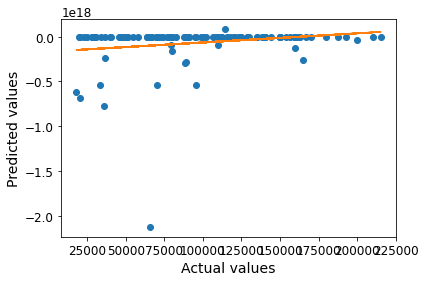

In [21]:
lin_reg = LinearRegression() # no random state for linearregression model
lin_reg.fit(x_train, y_train)
lin_y_predict = lin_reg.predict(x_test)
print("LinearRegression MAE: ", mean_absolute_error(y_test, lin_y_predict))
plotgraph(y_test, lin_y_predict)

## GradientBoostingRegressor

### Without GridSearchCV

GradientBoostingRegressor without GridSearchCV MAE:  24878.97950308882


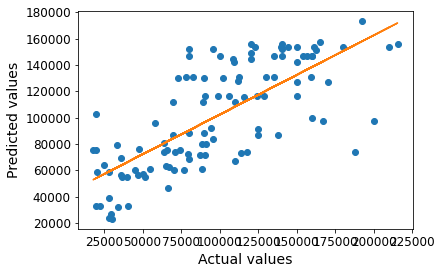

In [22]:
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(x_train, y_train)
GBR2_y_predict = GBR.predict(x_test)
print("GradientBoostingRegressor without GridSearchCV MAE: ", mean_absolute_error(y_test, GBR2_y_predict))
plotgraph(y_test, GBR2_y_predict)

### With GridSearchCV

#### https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression


 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.0025, max_depth=4,
                          max_features='auto', n_estimators=1500,
                          random_state=42, subsample=0.9)

 The best score across ALL searched params:
 0.5617695390177229

 GradientBoostingRegressor with GridSearchCV MAE:  25205.825087081816


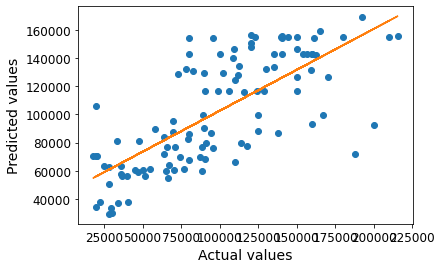

In [23]:
GBR = GradientBoostingRegressor(random_state=42)
parameters = {'learning_rate': [0.0025],
              'subsample'    : [0.9],
              'n_estimators' : [1500],
              'max_depth'    : [4],
              'max_features' : ['auto']
              }
# parameters = {'learning_rate': [0.001, 0.005, 0.0025, 0.01,0.02,0.03,0.04],
#               'subsample'    : [0.9, 0.5, 0.2, 0.1, 0.05, 0.01],
#               'n_estimators' : [10,50,100,500,1000, 1500],
#               'max_depth'    : [2,4,6,8,10],
#               'max_features' : ['auto', 'sqrt', 'log2']
#               }

# started off with:
# parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#               'subsample'    : [0.9, 0.5, 0.2, 0.1],
#               'n_estimators' : [100,500,1000, 1500],
#               'max_depth'    : [4,6,8,10]
#               }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 5,n_jobs=-1)
grid_GBR.fit(x_train, y_train)

print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
GBR_y_predict = grid_GBR.predict(x_test)
print("\n GradientBoostingRegressor with GridSearchCV MAE: ",mean_absolute_error(y_test, GBR_y_predict))
plotgraph(y_test, GBR_y_predict)

## RandomForestRegressor

### Without GridSearchCV

RandomForestRegressor without GridSearchCV MAE:  25954.288316886483


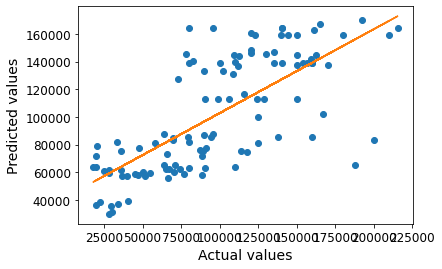

In [24]:
regr = RandomForestRegressor(max_depth=7, random_state=42)
regr.fit(x_train, y_train)
forest_y_predict = regr.predict(x_test)
print("RandomForestRegressor without GridSearchCV MAE: ", mean_absolute_error(y_test, forest_y_predict))
plotgraph(y_test, forest_y_predict)

### With GridSearchCV


 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', n_estimators=500, random_state=42)

 The best score across ALL searched params:
 0.5358343638430827

 RandomForestRegressor with GridSearchCV MAE:  25330.08702752294


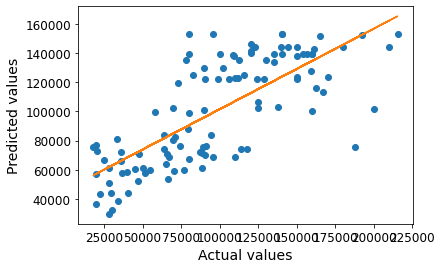

In [25]:
regr = RandomForestRegressor(random_state=42)

# parameters = {'max_depth'    : [6,7,8,10],
#               'max_features' : [3,4,5,6],
#               'n_estimators' : [50,100,500,1000, 1500],
#               'max_features' : ['auto','sqrt', 'log2'],
#               'criterion'    : ['squared_error', 'absolute_error', 'poisson']
#               }
parameters = {'max_depth'    : [10],
              'n_estimators' : [500],
              'max_features' : ['sqrt'],
              'criterion'    : ['absolute_error']
              }
grid_RFR = GridSearchCV(estimator=regr, param_grid = parameters)
grid_RFR.fit(x_train, y_train)

print("\n The best estimator across ALL searched params:\n",grid_RFR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFR.best_score_)
forest_y_predict = grid_RFR.predict(x_test)
print("\n RandomForestRegressor with GridSearchCV MAE: ", mean_absolute_error(y_test, forest_y_predict))
plotgraph(y_test, forest_y_predict)

##### Below 25 000 MAE would be good